# Propuesta de visualizaciones:

1. [Evolución de duración media de viaje (2018–2025)][1]
2. Distribución de motivos de viaje
3. Mapa de calor: motivos de viaje por comunidad (rural vs ciudad)
4. Comparativa gasto medio turista "nuevo modelo de viaje" vs general (por ejemplo, nómadas digitales vs familias)
5. Línea temporal: turismo experiencial vs tradicional

[1] Ver si hay datos disponibles e 2025 o tan solo hasta 2024.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_internacional = pd.read_csv('./data/df_internacional.csv')
df_nacional = pd.read_csv('./data/df_nacional.csv')
df_gasto_ccaa = pd.read_csv('./data/df_gasto_ccaa.csv')
df_gasto_total = pd.read_csv('./data/df_gasto_total.csv')
df_final = pd.read_csv('./data/df_final.csv')

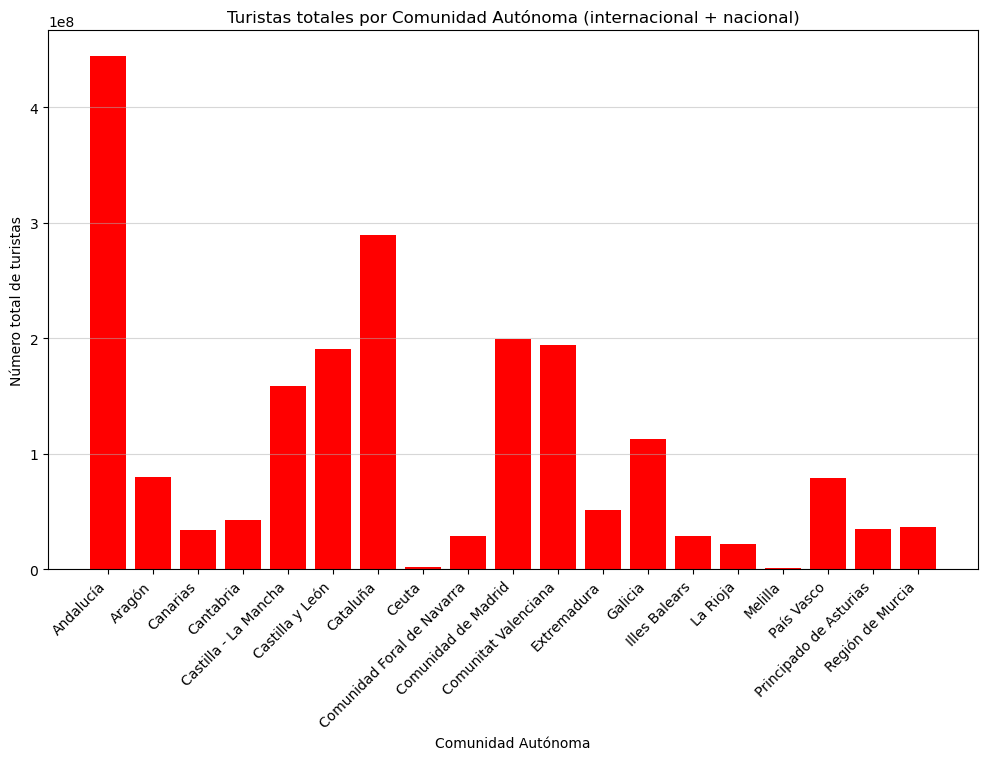

In [48]:
# Total de turistas por comunidad

df_agg = df_final.groupby("CCAA_DESTINO").agg({"VISITANTES": "sum","TURISTAS": "sum","GASTO": "sum"}).reset_index()

df_agg["TURISTAS_TOTALES"] = df_agg["VISITANTES"] + df_agg["TURISTAS"]

plt.figure(figsize=(12, 7))
plt.bar(df_agg["CCAA_DESTINO"], df_agg["TURISTAS_TOTALES"], color="red")
plt.title("Turistas totales por Comunidad Autónoma (internacional + nacional)")
plt.ylabel("Número total de turistas")
plt.xlabel("Comunidad Autónoma")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', alpha=0.5)
plt.show()

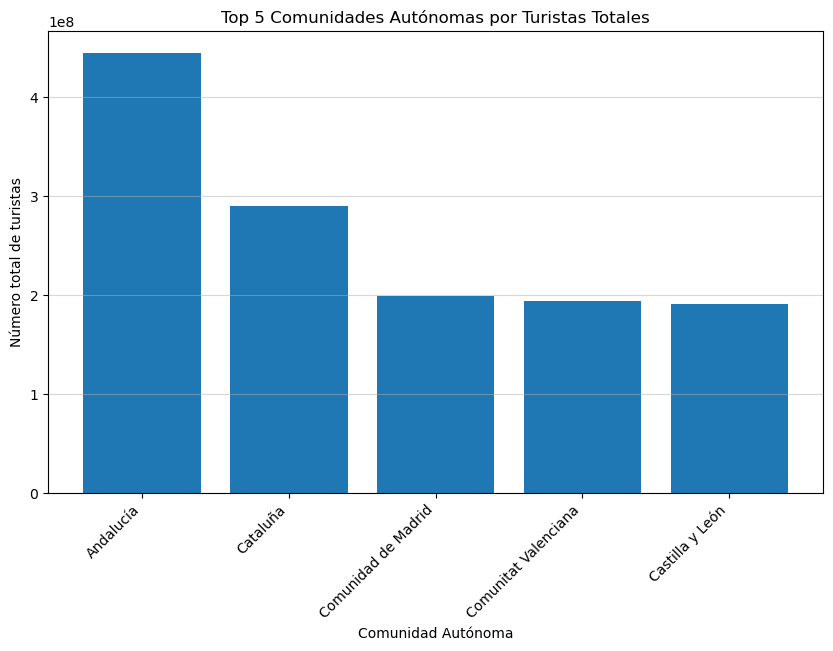

In [44]:
# Top 5 comunidades con mas turistas

df_top5 = df_agg.sort_values("TURISTAS_TOTALES", ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.bar(df_top5["CCAA_DESTINO"], df_top5["TURISTAS_TOTALES"])
plt.title("Top 5 Comunidades Autónomas por Turistas Totales")
plt.ylabel("Número total de turistas")
plt.xlabel("Comunidad Autónoma")
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', alpha=0.5)
plt.show()

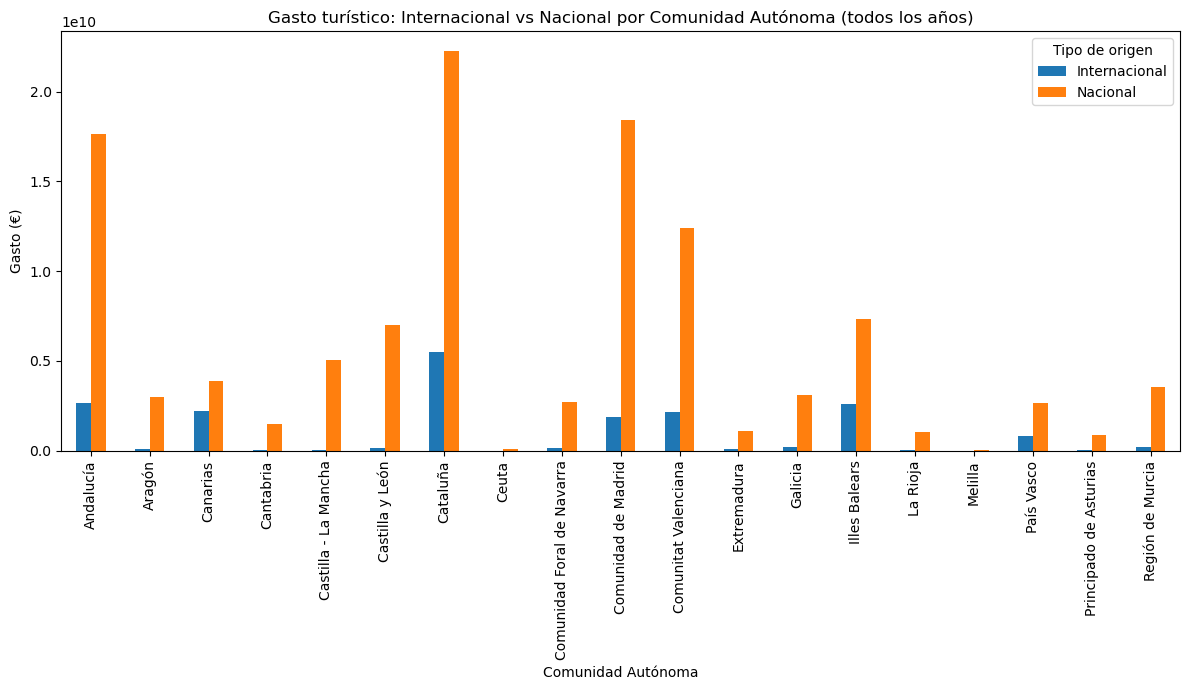

In [46]:
# Agrupamos gasto total por comunidad y tipo origen (Internacional/Nacional)

df_gasto_agg = df_gasto_total.groupby(["CCAA_DESTINO", "TIPO_ORIGEN"])["GASTO"].sum().unstack().fillna(0)

df_gasto_agg.plot(kind="bar", figsize=(12,7))

plt.title("Gasto turístico: Internacional vs Nacional por Comunidad Autónoma (todos los años)")
plt.ylabel("Gasto (€)")
plt.xlabel("Comunidad Autónoma")
plt.legend(title="Tipo de origen")
plt.tight_layout()
plt.show()